In [1]:
import sentinel_collection as sc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import planetary_computer
import s1_functions

In [2]:
year = ['2018', '2020', '2021']
data = list(map(sc.s1, year))

Processing year: 2018-01-01/2018-12-31
Processing year: 2020-01-01/2020-12-31
Processing year: 2021-01-01/2021-12-31


In [3]:
data[0].stack

<xarray.DataArray 'stackstac-d2f5ef101e6c8023c045275ec8687e31' (time: 28,
                                                                band: 2,
                                                                y: 4527, x: 5192)>
dask.array<fetch_raster_window, shape=(28, 2, 4527, 5192), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/39)
  * time                                   (time) datetime64[ns] 2018-01-08T1...
    id                                     (time) <U66 'S1A_IW_GRDH_1SDV_2018...
  * band                                   (band) <U2 'vh' 'vv'
  * x                                      (x) float64 4.025e+05 ... 4.544e+05
  * y                                      (y) float64 1.257e+06 ... 1.212e+06
    s1:processing_level                    <U1 '1'
    ...                                     ...
    sar:looks_equivalent_number            float64 4.4
    sar:pixel_spacing_range                int64 10
    description                            (band) <U173 'Terrain-corrected ga...
    title                                  (band) <U41 'VH: vertical transmit...
    raster:bands                           object {'nodata': -32768, 'data_ty...
    epsg                                   int64 32630
Attributes:
    spec:        RasterSpec(epsg=32630, bounds=(402490, 1212020, 454410, 1257...
    crs:         epsg:32630
    transform:   | 10.00, 0.00, 402490.00|\n| 0.00,-10.00, 1257290.00|\n| 0.0...
    resolution:  10

In [4]:
def db_scale(x):
    return 10 * np.log10(x)

[Text(0.5, 1.0, 'VV'), Text(0.5, 0, ''), Text(0, 0.5, ''), [], []]

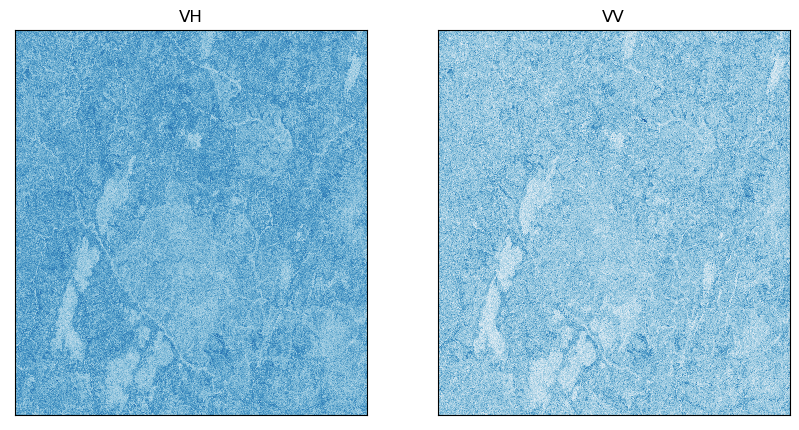

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
db_scale(data[0].stack[0, 0, :, :]).plot.imshow(ax = ax[0], add_colorbar = False)
db_scale(data[0].stack[0, 1, :, :]).plot.imshow(ax = ax[1], add_colorbar = False)
ax[0].set(title = 'VH', xlabel = '', ylabel = '', xticks = [], yticks = [])
ax[1].set(title = 'VV', xlabel = '', ylabel = '', xticks = [], yticks = [])

Text(0.5, 0, 'Day of the year')

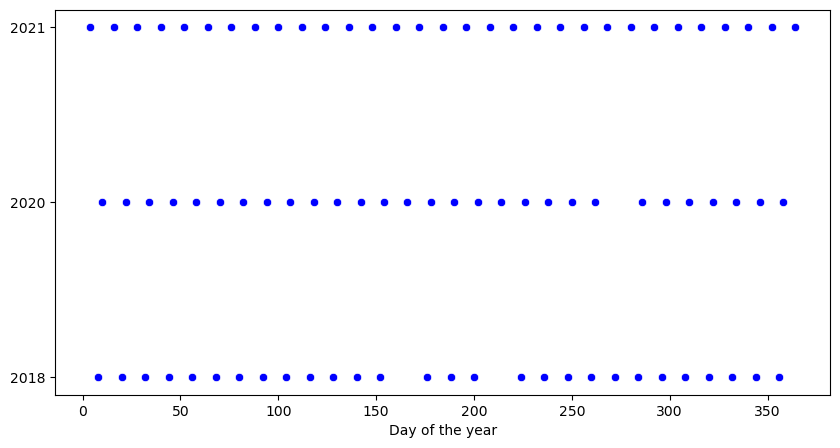

In [6]:
plt.figure(figsize= (10, 5))

for i, dat in enumerate(data):
    sns.scatterplot(x = dat.doy, y = i, color = 'b')

plt.yticks(ticks = [0, 1, 2], labels = ['2018', '2020', '2021'])
plt.xlabel('Day of the year')
#plt.legend(["No intersect data", "Intersect data"], loc=(1,0.8), frameon=False)

In [7]:
data[0].doy, data[1].doy, data[2].doy

(array([  8,  20,  32,  44,  56,  68,  80,  92, 104, 116, 128, 140, 152,
        176, 188, 200, 224, 236, 248, 260, 272, 284, 296, 308, 320, 332,
        344, 356]),
 array([ 10,  22,  34,  46,  58,  70,  82,  94, 106, 118, 130, 142, 154,
        166, 178, 190, 202, 214, 226, 238, 250, 262, 286, 298, 310, 322,
        334, 346, 358]),
 array([  4,  16,  28,  40,  52,  64,  76,  88, 100, 112, 124, 136, 148,
        160, 172, 184, 196, 208, 220, 232, 244, 256, 268, 280, 292, 304,
        316, 328, 340, 352, 364]))

In [ ]:
# homogenize to 31 time steps

In [8]:
len(data[0].doy), len(data[1].doy), len(data[2].doy)

(28, 29, 31)

In [9]:
union = np.union1d(np.union1d(data[0].doy + 2 , data[1].doy), data[2].doy)

In [10]:
len(union)

61

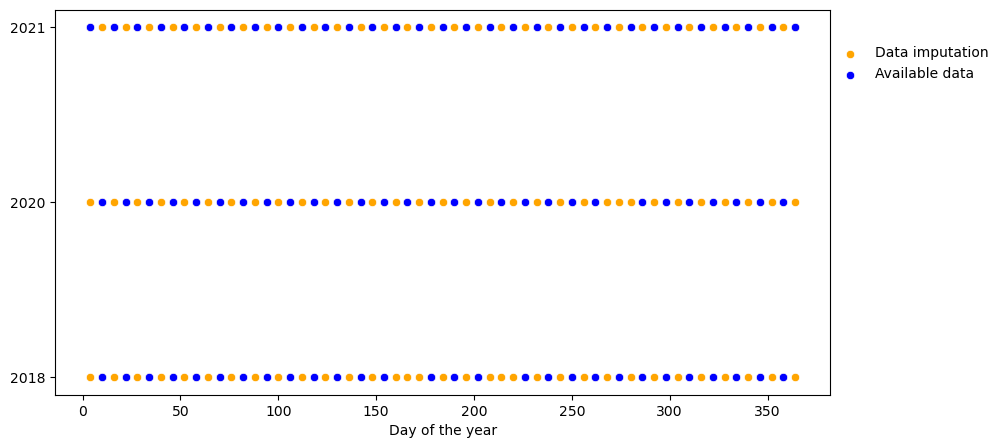

In [11]:
plt.figure(figsize= (10, 5))

for i, dat in enumerate(data):
    if i == 0:
        sns.scatterplot(x = union, y = i, color = 'orange')
        sns.scatterplot(x = dat.doy +2, y = i, color = 'b')
    else:
        sns.scatterplot(x = union, y = i, color = 'orange')
        sns.scatterplot(x = dat.doy, y = i, color = 'b')
    

plt.yticks(ticks = [0, 1, 2], labels = ['2018', '2020', '2021'])
plt.xlabel('Day of the year')
plt.legend(["Data imputation", "Available data"], loc=(1,0.8), frameon=False)

In [23]:
not2018 = np.setdiff1d(union, data[0].doy + 2)
not2020 = np.setdiff1d(union, data[1].doy)
not2021 = np.setdiff1d(union, data[2].doy)
print(len(not2018), len(not2020), len(not2021))

21 7 3


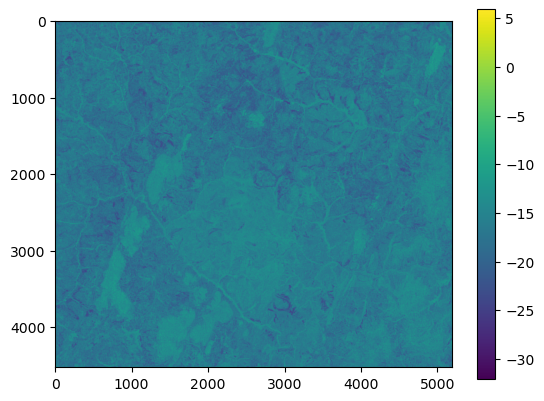

In [10]:
plt.imshow(db_scale(data[0].stack[[38], 0, :, :].squeeze()))
plt.colorbar()

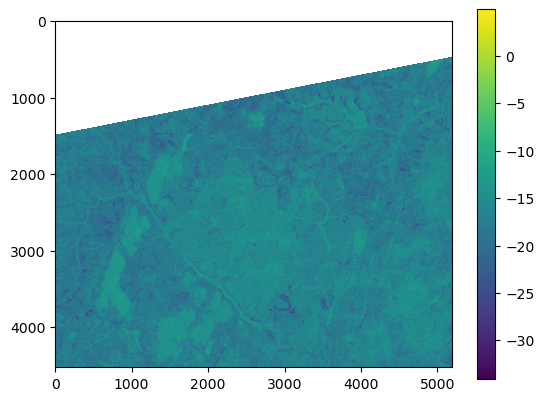

In [24]:
plt.imshow(db_scale(data[0].stack[[39], 0, :, :].squeeze()))
plt.colorbar()

In [11]:
img = np.array(db_scale(data[0].stack[[0, 20, 38], 0, :, :])).swapaxes(0,2).swapaxes(0,1)

In [17]:
data[0].stack[[0, 20, 38], 0, :, :].indexes['time']

DatetimeIndex(['2018-01-08 18:27:53.534295', '2018-08-24 18:28:00.855468',
               '2018-12-22 18:28:00.836486'],
              dtype='datetime64[ns]', name='time', freq=None)

In [12]:
def normalize_img(x):
    
    z = (x - np.min(x, axis=(0, 1))) / (np.max(x, axis=(0, 1)) - np.min(x, axis=(0, 1)))
    return z 

In [13]:
img2 = normalize_img(img)

([], [])

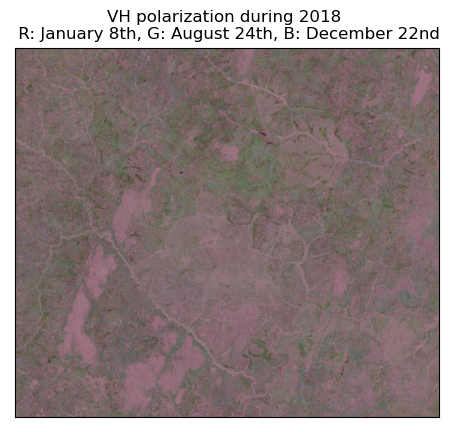

In [20]:
plt.imshow(img2)
plt.title('VH polarization during 2018 \n R: January 8th, G: August 24th, B: December 22nd')
plt.xticks([])
plt.yticks([])